# Here are some examples of catplot functionality...

In [1]:
import avt
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

## Clockplot:

In [2]:
# creating a datetime table with random groups and frequencies

dattime_col = pd.to_datetime(
    pd.Timestamp(dt.datetime.now().date())
    + pd.timedelta_range(
        start='0 day', 
        end='1 day', 
        freq='30T', 
        closed='left'
        )
    )

dattime_col = np.random.choice(dattime_col, size=1000)
group = np.random.choice(4, size=1000)

data = pd.DataFrame({'datetime': dattime_col, 'group': group})
data.head()

,datetime,group
0,2023-04-12 12:30:00,1
1,2023-04-12 12:00:00,1
2,2023-04-12 08:00:00,2
3,2023-04-12 11:00:00,1
4,2023-04-12 21:00:00,1


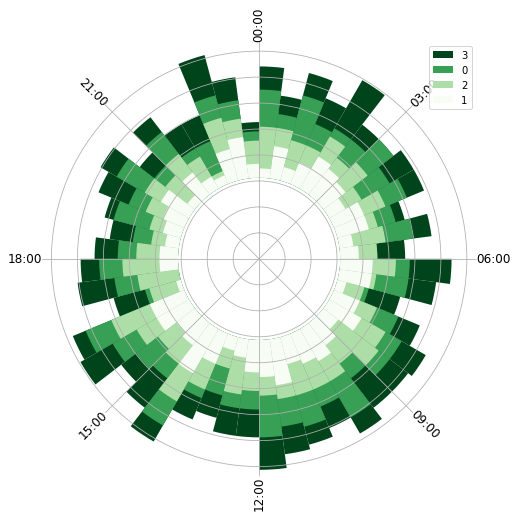

In [3]:
ax = avt.clockplot(
    data, 
    x='datetime', 
    hue='group',
    label_format='%H:%M', 
    label_freq='3H',
    cmap='Greens',
    )

# saving graph
ax.figure.savefig('./figures/clockplot.png', bbox_inches='tight', dpi=300)
ax.figure.savefig('../docs/source/figures/clockplot.png', bbox_inches='tight', dpi=300)

## Time Freq Heatmap:

In [4]:
# creating a datetime table with random groups and frequencies

dattime_col = pd.to_datetime(
    pd.Timestamp(dt.datetime.now().date())
    + pd.timedelta_range(
        start='0 day', 
        end='1 day', 
        freq='30T', 
        closed='left'
        )
    )

dattime_col = np.random.choice(dattime_col, size=1000)
group = np.random.choice(4, size=1000)

data = pd.DataFrame({'datetime': dattime_col, 'group': group})
data.head()

,datetime,group
0,2023-04-12 09:30:00,1
1,2023-04-12 16:00:00,1
2,2023-04-12 01:30:00,3
3,2023-04-12 06:30:00,2
4,2023-04-12 14:30:00,3


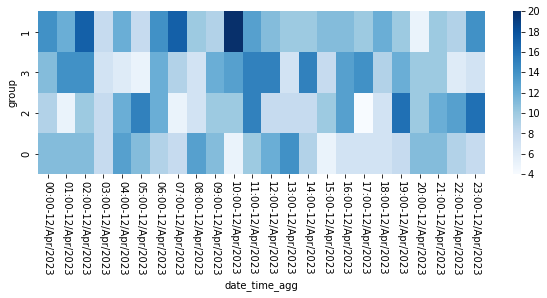

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax = avt.timefreqheatmap(
    data,
    x='datetime',
    hue='group',
    freq='1H',
    label_format='%H:%M-%d/%b/%Y',
    cmap='Blues',
    ax=ax,
    )

# saving graph
ax.figure.savefig('./figures/timefreqheatmap.png', bbox_inches='tight', dpi=300)
ax.figure.savefig('../docs/source/figures/timefreqheatmap.png', bbox_inches='tight', dpi=300)

## Waterfall Plot:

Given data that represents some breakdown of another value, you may do the following:

In [6]:
# fake data:
inputs = np.arange(100) * np.random.choice([-1,1], size=100)
features = [f"Feature {i}" for i in range(10)]*10

data = pd.DataFrame(
    inputs,
    index=features,
    columns=['Inputs']
).rename_axis('Feature').reset_index()
data.head()

,Feature,Inputs
0,Feature 0,0
1,Feature 1,1
2,Feature 2,-2
3,Feature 3,3
4,Feature 4,-4


Here, we are interested in how the sum of the values for each feature affects the overall sum:

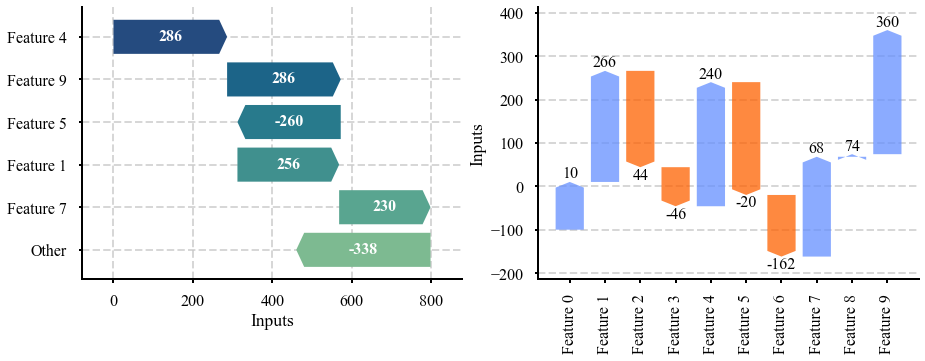

In [7]:
with avt.paper_theme():
    fig, axes = plt.subplots(1,2,figsize=(15,5))

    axes[0] = avt.waterfallplot(
        data=data,
        x="Inputs",
        y="Feature",
        orient="h",
        # order by absolute sum of inputs
        order=(
            data.groupby('Feature').sum()
            .sort_values('Inputs', ascending=False, key=abs).index[:5]
        ),
        alpha=1,
        cmap='crest', # fun cmap
        ax=axes[0],
        bar_label=False, # add bar labels manually below
    )
    axes[0].set_ylabel("")
    axes[0].grid(True)
    
    # manual bar labels
    # avt function must be used instead 
    # of plt.bar_label
    avt.bar_labels(
        axes[0], fmt='%g', label_type='center',
        size=16, color='white', weight='bold'
    )

    axes[1] = avt.waterfallplot(
        data=data,
        x="Feature",
        y="Inputs",
        base=-100,
        orient="v",
        ax=axes[1],
        bar_label_kwargs={'fmt': '%g', 'label_type': 'edge'},
    )
    axes[1].tick_params('x', rotation=90)
    axes[1].set_xlabel("")


    # saving graph
    fig.savefig('./figures/waterfallplot.png', bbox_inches='tight', dpi=300)
    fig.savefig('../docs/source/figures/waterfallplot.png', bbox_inches='tight', dpi=300)

## Radar Plot:

In [8]:
# Set data
data = pd.DataFrame({
    'group': ['A','B','C','D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
}).melt(id_vars='group')
data.head()

,group,variable,value
0,A,var1,38.0
1,B,var1,1.5
2,C,var1,30.0
3,D,var1,4.0
4,A,var2,29.0


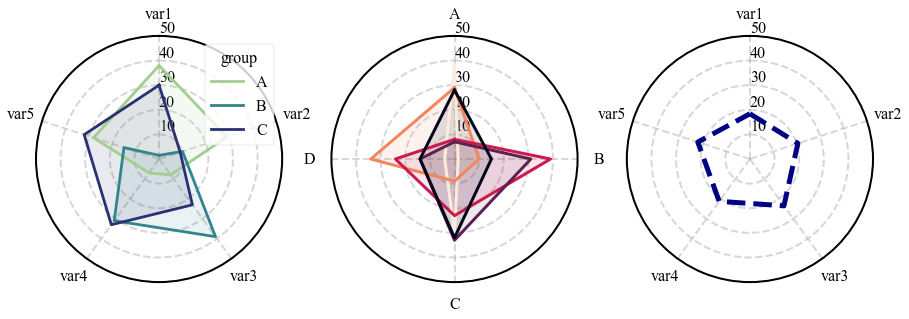

In [9]:
with avt.paper_theme():
    # ensure you make subplots polar if using your own axes!
    fig, axes = plt.subplots(1,3,figsize=(15,5), subplot_kw={'polar': True}) 

    axes[0] = avt.radarplot(
        data=data, 
        x='variable', 
        y='value', 
        hue='group', 
        hue_order=['A', 'B', 'C',],
        cmap='crest',
        ax=axes[0],
    )

    axes[1] = avt.radarplot(
        data=data, 
        x='group', 
        y='value', 
        hue='variable',
        cmap='rocket_r',
        ax=axes[1],
        fill=True,
        linewidth=3,
        legend=False
    )

    axes[2] = avt.radarplot(
        data=data, 
        x='variable', 
        y='value', 
        cmap='jet',
        ax=axes[2],
        fill=False,
        linestyle='--',
        linewidth=5,
        legend=False
    )

    axes[0].set_rlim(0, 50)
    axes[1].set_rlim(0, 50)
    axes[2].set_rlim(0, 50)

    # saving graph
    fig.savefig('./figures/radarplot.png', bbox_inches='tight', dpi=300)
    fig.savefig('../docs/source/figures/radarplot.png', bbox_inches='tight', dpi=300)